# Calculation of invariant functions and classification by their values

1. Calculate the invariant functions for reference images a.bmp, b.bmp, f.bmp, m.bmp.
2. For images a1.bmp, a2.bmp, b1.bmp, f1.bmp, m1.bmp, classify images according to their values of invariant functions (1), (2).

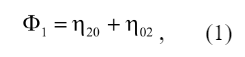
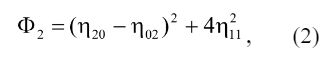

In order to calculate the values of the invariant functions, we need to calculate the central moments, the centers of mass and then the normalized central moments. Note that the image is discrete, so the formulas for calculations will look like this:

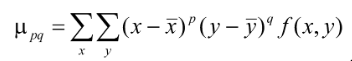
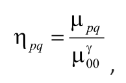  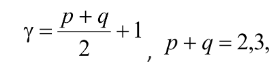

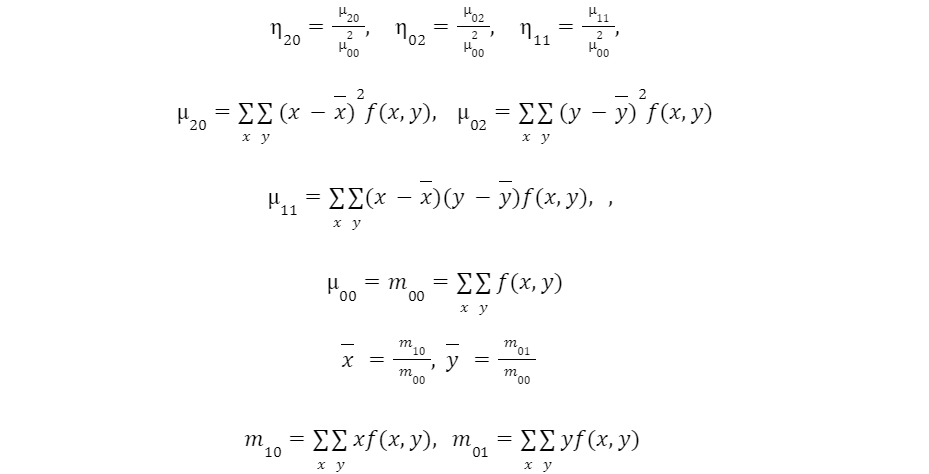

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import math


def calculate_inv_f(image):
    grey_image = np.mean(image, axis=2)

    x_coord = np.arange(grey_image.shape[1])
    y_coord = np.arange(grey_image.shape[0])[:, np.newaxis]

    m10 = np.sum(x_coord * grey_image)
    m01 = np.sum(y_coord * grey_image)
    mu00 = np.sum(grey_image)

    x_c = m10 / mu00
    y_c = m01 / mu00

    x_coord = x_coord - x_c
    y_coord = y_coord - y_c

    mu11 = np.sum(x_coord * y_coord * grey_image)
    mu20 = np.sum(x_coord ** 2 * grey_image)
    mu02 = np.sum(y_coord ** 2 * grey_image)

    nu20 = mu20 / mu00 ** 2
    nu02 = mu02 / mu00 ** 2
    nu11 = mu11 / mu00 ** 2

    f1 = nu20 + nu02
    f2 = (nu20 - nu02) ** 2 + 4 * nu11 ** 2

    return f1, f2

names = ['a', 'a1', 'a2', 'b', 'b1', 'f', 'f1', 'm', 'm1']

images = [plt.imread(f'C:/Users/Diana/Lab3.1/{name}.bmp') for name in names]

inv_f = [calculate_inv_f(img) for img in images]

for name, invf in zip(names, inv_f):
    print(name, invf)

a (0.0008961980641907847, 1.908201527235943e-07)
a1 (0.000898452255263166, 1.9318752077765867e-07)
a2 (0.0009002807976390632, 1.9840051638475897e-07)
b (0.0010385980717081778, 2.97906712601779e-07)
b1 (0.001018245385611099, 1.378198857553208e-07)
f (0.0008051953102151365, 1.0855783568126902e-07)
f1 (0.0008046873504038478, 1.0827179749391689e-07)
m (0.0007432439267953367, 4.051434143616764e-09)
m1 (0.0007427649039333855, 3.259155140177009e-09)


# 
Here we have found Ф1, Ф2 for such images:
a.bmp, a1.bmp, a2.bmp
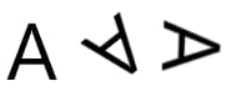 
b.bmp, b1.bmp
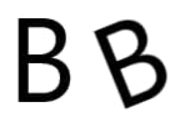
f.bmp, f1.bmp
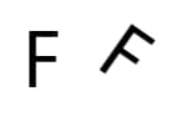
m.bmp, m1.bmp
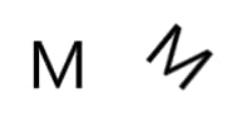


# 
Then we need to classify images. We can do this in several ways. Firstly, I calculate the Euclidean norm to see
distance among points. Distance have to be short between points(values of invariant functions) that shows the same
letter.
Function smallest_difference(n, nums, name) shows the nearest point to point of invariant functions values of reference image.

In [169]:
def distance(c1, c2):
    return math.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)

def smallest_difference(n, nums, name):
    l = []
    for i in range(len(nums)):
        if i != n:
            diff = distance(n, nums[i])
            l.append(diff)
        if i == n:
            l.append(0)
            
    l_without_0 = l 
    l_without_0.remove(0) 
    smallest = min(l_without_0)
    
    index = l.index(smallest)
    nearest_name = names[index+1]
    
    return smallest, nearest_name 
    

print(f'\ndistance a, a1 = {distance(inv_f[0],inv_f[1])}')
print(f'distance a1, a2 = {distance(inv_f[1],inv_f[2])}')
print(f'distance a2, a1 = {distance(inv_f[2],inv_f[0])}')
print(f'distance b, b1 = {distance(inv_f[0],inv_f[4])}')
print(f'distance f, f1 = {distance(inv_f[5],inv_f[6])}')
print(f'distance m, m1 = {distance(inv_f[7],inv_f[8])}\n')

print(smallest_difference(inv_f[0], inv_f, names))
for i in range(3,8,2):
    print(smallest_difference(inv_f[i], inv_f, names))


distance a, a1 = 2.2541923154945945e-06
distance a1, a2 = 1.8285498067526853e-06
distance a2, a1 = 4.082740485458958e-06
distance b, b1 = 0.00012204733292826102
distance f, f1 = 5.079598918245236e-07
distance m, m1 = 4.790235171449873e-07

(2.2541923154945945e-06, 'a1')
(2.03533156797205e-05, 'b1')
(5.079598918245236e-07, 'f1')
(4.790235171449873e-07, 'm1')


# 
We can also use a KMeans method of clustering as an option to classify images.

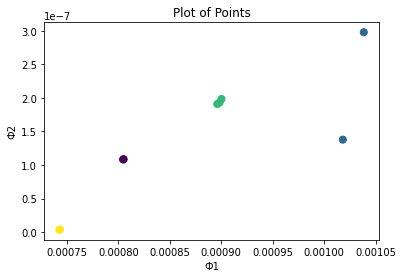

In [170]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

dots = np.array([(0.0008961980641907847, 1.908201527235943e-07), (0.000898452255263166, 1.9318752077765867e-07), (0.0009002807976390632, 1.9840051638475897e-07), (0.0010385980717081778, 2.97906712601779e-07), (0.001018245385611099, 1.378198857553208e-07), (0.0008051953102151365, 1.0855783568126902e-07), (0.0008046873504038478, 1.0827179749391689e-07), (0.0007432439267953367, 4.051434143616764e-09), (0.0007427649039333855, 3.259155140177009e-09)])

kmeans = KMeans(n_clusters=4).fit(dots)

plt.scatter(dots[:,0], dots[:,1], c=kmeans.labels_, s = 50)
plt.xlabel('Ф1')
plt.ylabel('Ф2')
plt.title('Plot of Points')
plt.show()

plt.show()

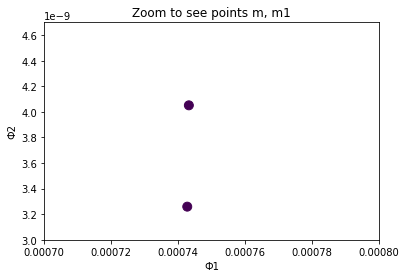

In [94]:
plt.scatter(x, y, s = 80, c = kmeans.labels_)

plt.axis([0.0007, 0.0008,  0.000000003, 0.0000000047])

plt.xlabel('Ф1')
plt.ylabel('Ф2')
plt.title('Zoom to see points m, m1')

plt.show()

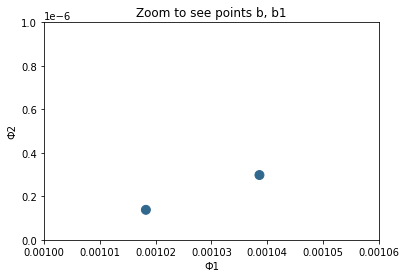

In [99]:
plt.scatter(x, y, s = 80, c = kmeans.labels_)

plt.axis([0.001, 0.00106,  0, 0.000001])

plt.xlabel('Ф1')
plt.ylabel('Ф2')
plt.title('Zoom to see points b, b1')

plt.show()

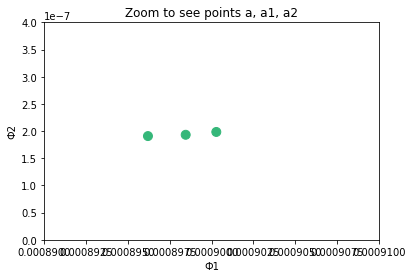

In [96]:
plt.scatter(x, y, s = 80, c = kmeans.labels_)

plt.axis([0.00089, 0.00091,  0, 0.0000004])

plt.xlabel('Ф1')
plt.ylabel('Ф2')
plt.title('Zoom to see points a, a1, a2')

plt.show()

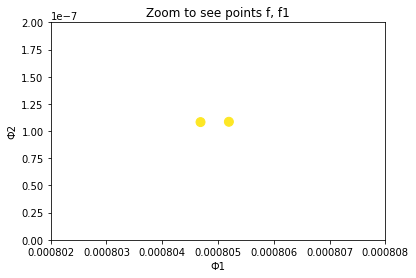

In [98]:
plt.scatter(x, y, s = 80, c = kmeans.labels_)

plt.axis([0.000802, 0.000808,  0, 0.0000002])

plt.xlabel('Ф1')
plt.ylabel('Ф2')
plt.title('Zoom to see points f, f1')

plt.show()